In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# gerais

import re
import pandas as pd
from tqdm import tqdm

# Gensim
from nltk import tokenize
import gensim.corpora as corpora
from gensim.models import CoherenceModel

#plot
import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.gensim_models

%matplotlib inline
import emoji

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from unidecode import unidecode


from string import punctuation

from gensim.models import LdaMulticore, CoherenceModel
from tqdm import tqdm


In [ ]:
df = pd.read_csv('../datasets/Fundamentos_Religiosos_2022_WhatsApp.csv')

In [4]:
len(df)

598971

In [5]:
df.head()

,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5,pre_processed_text
date_message,,,,,,,,,,,,,,,,,,,
2022-10-10 18:20:24,9d737b3c9387855139bbad2311cc5709,0638569ee76dac58f59dcac20463c955,NaN,NaN,NaN,False,False,False,5,2022-10-10 18:20:25.000937,-0.7003,0.843775,F7023FFB06C429A2C166922849A35ED8,558594228826.0:12@s.whatsapp.net,Texto,whatsapp,NaN,NaN,️ hoje que eu fique sabendo do canal lula fli...
2022-10-10 22:02:58,1660a60f661754d2802ca53296e25be8,a5910d5cc1c830ade9eb4dd00f15ff6a,NaN,NaN,NaN,False,False,False,5,2022-10-10 22:02:58.4682,-0.2960,NaN,A9FAC78070C144890D181EF415B90CAD,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN,mais pra que isso não aconteça nois temos quê ...
2022-10-11 00:39:31,c882172d447798d74915973ac83eba68,b84dfe2d1599b82768dcdecce7e6bb23,d2e0ec59ffd9f84764f5b147725d7196.oga,audio/ogg; codecs=opus,NaN,True,False,False,5,2022-10-11 00:39:33.445125,NaN,NaN,737948BE86D450A426470794F91BC80D,558594228826.0:12@s.whatsapp.net,Audio,whatsapp,NaN,d2e0ec59ffd9f84764f5b147725d7196,NaN
2022-10-10 23:36:19,91e3c22c08b24ba01ac4524d77bcb1da,addb88a34374d43aa9ecd4df7359ce39,NaN,NaN,NaN,False,False,False,5,2022-10-10 23:36:19.724987,-0.1531,NaN,439A91ADD8F355CD23C4BB107A5E88BB,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN,‎acesse este link para entrar no meu grupo do ...
2022-10-10 23:40:12,77c1a8a31fee269db258a028a61f0b88,a5831b109d4d95fae8ee0ce464e48a6a,bb80cd530332bb6b95c34e719992d249.f4v,video/mp4,NaN,True,False,False,5,2022-10-10 23:40:14.397495,NaN,NaN,092203A082AC3DFB2A4933F60453AEB8,558594228826.0:12@s.whatsapp.net,Video,whatsapp,NaN,bb80cd530332bb6b95c34e719992d249,NaN


In [6]:
df.columns

Index(['id_member_anonymous', 'id_group_anonymous', 'media', 'media_type',
       'media_url', 'has_media', 'has_media_url', 'trava_zap',
       'dataset_info_id', 'date_system', 'score_sentiment',
       'score_misinformation', 'id_message', 'id_persona', 'message_type',
       'messenger', 'media_name', 'media_md5', 'pre_processed_text'],
      dtype='object')

In [5]:
ids_para_remover = ['6ef561ec0f448afcd7b3751124bb0712','d3e678a0ba0e1485548260a7c4599152',
                    'ac5703154484de05336af617455ca55e','a39edbd64d378226ffa60433649a0acf',
                    'c66d0d4ae5a4b281bff67e1fa4fbd6ba','819bbc872ed6d81f44d746b710eecf06',
                    'ec94da4d54f9a5693e88fa582926be53','6a38c72316d87c028dfd66c10442476b',
                    '94099e1e46f129856541e2b3640896d1','8f367d1693fff47218603fa47ded525c',
                    'c09caffee0d1bd30926dea9df25dc88f']

In [6]:
# Filtrar o DataFrame para remover as linhas com esses IDs
df_filtrado = df[~df['id_member_anonymous'].isin(ids_para_remover)]
df_filtrado

,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5,pre_processed_text
date_message,,,,,,,,,,,,,,,,,,,
2022-10-10 18:20:24,9d737b3c9387855139bbad2311cc5709,0638569ee76dac58f59dcac20463c955,NaN,NaN,NaN,False,False,False,5,2022-10-10 18:20:25.000937,-0.7003,0.843775,F7023FFB06C429A2C166922849A35ED8,558594228826.0:12@s.whatsapp.net,Texto,whatsapp,NaN,NaN,️ hoje que eu fique sabendo do canal lula fli...
2022-10-10 22:02:58,1660a60f661754d2802ca53296e25be8,a5910d5cc1c830ade9eb4dd00f15ff6a,NaN,NaN,NaN,False,False,False,5,2022-10-10 22:02:58.4682,-0.2960,NaN,A9FAC78070C144890D181EF415B90CAD,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN,mais pra que isso não aconteça nois temos quê ...
2022-10-11 00:39:31,c882172d447798d74915973ac83eba68,b84dfe2d1599b82768dcdecce7e6bb23,d2e0ec59ffd9f84764f5b147725d7196.oga,audio/ogg; codecs=opus,NaN,True,False,False,5,2022-10-11 00:39:33.445125,NaN,NaN,737948BE86D450A426470794F91BC80D,558594228826.0:12@s.whatsapp.net,Audio,whatsapp,NaN,d2e0ec59ffd9f84764f5b147725d7196,NaN
2022-10-10 23:36:19,91e3c22c08b24ba01ac4524d77bcb1da,addb88a34374d43aa9ecd4df7359ce39,NaN,NaN,NaN,False,False,False,5,2022-10-10 23:36:19.724987,-0.1531,NaN,439A91ADD8F355CD23C4BB107A5E88BB,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN,‎acesse este link para entrar no meu grupo do ...
2022-10-10 23:40:12,77c1a8a31fee269db258a028a61f0b88,a5831b109d4d95fae8ee0ce464e48a6a,bb80cd530332bb6b95c34e719992d249.f4v,video/mp4,NaN,True,False,False,5,2022-10-10 23:40:14.397495,NaN,NaN,092203A082AC3DFB2A4933F60453AEB8,558594228826.0:12@s.whatsapp.net,Video,whatsapp,NaN,bb80cd530332bb6b95c34e719992d249,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13 00:46:56,b1b419f54664f6cd4fcdb40425862d36,b1b419f54664f6cd4fcdb40425862d36,7719ba57cbe74eb5c8059d6b1a14d1ca.f4v,video/mp4,NaN,True,False,False,5,2023-01-30 18:20:22.262572,NaN,NaN,08E682716448AB06DEE126A30E7AAA77,558594228826.0:17@s.whatsapp.net,Video,whatsapp,NaN,7719ba57cbe74eb5c8059d6b1a14d1ca,NaN
2022-11-13 13:37:03,2ad743e9ff831a75911a983b42205845,64c9a7c8ac338faa258e5aea9a1c2ae3,c6d59f0b86e63dbcce7fc682a1eaea50.f4v,video/mp4,NaN,True,False,False,5,2023-01-30 18:20:22.269632,NaN,NaN,3EB0259ED9B8FACF18A9,558594228826.0:17@s.whatsapp.net,Video,whatsapp,NaN,c6d59f0b86e63dbcce7fc682a1eaea50,NaN
2022-11-13 17:43:22,b1b419f54664f6cd4fcdb40425862d36,b1b419f54664f6cd4fcdb40425862d36,003ace942d9665adc9647df9d9526c0c.jpeg,image/jpeg,NaN,True,False,False,5,2023-01-30 18:20:22.277283,NaN,NaN,5CD9F23CD07BEE38693E68E11F9C6A55,558594228826.0:17@s.whatsapp.net,Imagem,whatsapp,NaN,003ace942d9665adc9647df9d9526c0c,NaN


In [7]:
# Removendo linhas com valores NaN na coluna 'pre_processed_text'
df_filtrado = df_filtrado.dropna(subset=['pre_processed_text'])

# Removendo trava_zap
df_filtrado = df_filtrado[df_filtrado['trava_zap'] == False]



#df_filtrado = df_filtrado[0:100]
len(df_filtrado)

254480

In [8]:
token_espaco = tokenize.WhitespaceTokenizer()
token_pontuacao = tokenize.WordPunctTokenizer()

In [9]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('portuguese'))

def preprocess_text(text):

    # Função para extrair e substituir o domínio da URL
    def substituir_dominios(texto):
        # Função para extrair e substituir o domínio da URL
        def extrair_dominio(url):
            # Remove o protocolo (http://, https://, etc.) e o "www." se presente
            dominio = re.sub(r'^https?://(?:www\.)?|www\.', '', url)
            # Remove o caminho e parâmetros da URL
            dominio = re.split(r'[/?#]', dominio)[0]
            # Retorna a parte principal do domínio (antes do primeiro ponto)
            return dominio.split('.')[0]

        # Substitui URLs por seus domínios principais
        return re.sub(r'https?://(?:www\.)?\S+|www\.\S+', lambda match: extrair_dominio(match.group(0)), texto)

    # Substituir domínios
    text = substituir_dominios(text)

    # Converte para minúsculas
    text = text.lower()

    # Remove acentos
    text = unidecode(text)

    #Remover Pontuação
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove URLs e menções
    #text = re.sub(r'http\S+|www\S+|https\S+|@\w+', '', text)

    # Substitui emojis repetidos por apenas um
    text = re.sub(r'([\U00010000-\U0010FFFF])\1+', r'\1', text)
    text = re.sub(r'([\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]|[\U0001F780-\U0001F7FF]|[\U0001F800-\U0001F8FF]|[\U0001F900-\U0001F9FF]|[\U0001FA00-\U0001FA6F]|[\U0001FA70-\U0001FAFF])\1+', r'\1', text)


    # Remove espaços em branco extras (início ou final) e múltiplos espaços no meio do texto
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove pontuações e caracteres especiais
    #text = re.sub(r'[^\w\s]', '', text)

    # Ajusta risadas "kkk" ou mais para "kk"
    text = re.sub(r'k{2,}|K{2,}', 'kk', text)

    # Ajusta risadas "haha" ou mais para "haha"
    text = re.sub(r'(ha){2,}', 'haha', text, flags=re.IGNORECASE)

    # Ajusta risadas "kaka" ou mais para "kaka"
    text = re.sub(r'(ka){2,}', 'kaka', text, flags=re.IGNORECASE)

    # Remove as stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])


    return text


[nltk_data] Downloading package punkt to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:

df_geral = df_filtrado.copy()

# Aplicar o pré-processamento à coluna de texto
df_geral['text_processed'] = df_geral['pre_processed_text'].apply(preprocess_text)

In [59]:
df_geral.head()

,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5,pre_processed_text,text_processed
date_message,,,,,,,,,,,,,,,,,,,,
2022-10-10 18:20:24,9d737b3c9387855139bbad2311cc5709,0638569ee76dac58f59dcac20463c955,NaN,NaN,NaN,False,False,False,5,2022-10-10 18:20:25.000937,-0.7003,0.843775,F7023FFB06C429A2C166922849A35ED8,558594228826.0:12@s.whatsapp.net,Texto,whatsapp,NaN,NaN,️ hoje que eu fique sabendo do canal lula fli...,hoje fique sabendo canal lula flix vi pt entro...
2022-10-10 22:02:58,1660a60f661754d2802ca53296e25be8,a5910d5cc1c830ade9eb4dd00f15ff6a,NaN,NaN,NaN,False,False,False,5,2022-10-10 22:02:58.4682,-0.2960,NaN,A9FAC78070C144890D181EF415B90CAD,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN,mais pra que isso não aconteça nois temos quê ...,pra nao aconteca nois fazer anossa parte
2022-10-10 23:36:19,91e3c22c08b24ba01ac4524d77bcb1da,addb88a34374d43aa9ecd4df7359ce39,NaN,NaN,NaN,False,False,False,5,2022-10-10 23:36:19.724987,-0.1531,NaN,439A91ADD8F355CD23C4BB107A5E88BB,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN,‎acesse este link para entrar no meu grupo do ...,acesse link entrar grupo whatsapp chat whatsapp
2022-10-10 16:49:48,325720ed3339a91b8076df12c1e95c45,0e345813dcb62b0fe4d8537f311af0f1,NaN,NaN,https://m.kwai.com/photo/150000006567403/52240...,False,True,False,5,2022-10-10 16:49:50.051126,0.0000,NaN,F18BADED5AFA8FB0C33FE36625872DB8,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN,fortes palavras da pastora damares kwai-video com,fortes palavras pastora damares kwaivideo
2022-10-10 16:49:53,8ed44a70a011285622e2b8919c2c8c3e,3b3e64e81c3e3f3bfc5ba76ddb90fb2d,0d6f2896e5941ef1933e69bbd7a32f69.jpeg,image/jpeg,NaN,True,False,False,5,2022-10-10 16:49:54.713831,0.0000,NaN,724C233591C3A62A5231B47FF22ADE4B,558594228826.0:12@s.whatsapp.net,Imagem,whatsapp,NaN,0d6f2896e5941ef1933e69bbd7a32f69,,


### Calculando a diversidade dos tópicos
A diversidade de tópicos mede quantas palavras únicas existem entre os top-N termos de todos os tópicos. 

In [13]:

def topic_diversity(model, top_n=10):
    topic_words = []
    for k in range(model.num_topics):
        words = [word for word, _ in model.show_topic(k, topn=top_n)]
        topic_words.extend(words)
    unique_words = set(topic_words)
    return len(unique_words) / (top_n * model.num_topics)


### IRBO 

IRBO avalia quanto os tópicos são distintos entre si, usando o Rank-Biased Overlap (RBO) invertido. Quanto maior o IRBO, mais diferentes são os tópicos

In [14]:
import rbo

def compute_irbo(model, top_n=10):
    topics = []
    for k in range(model.num_topics):
        topic_terms = [word for word, _ in model.show_topic(k, topn=top_n)]
        topics.append(topic_terms)

    # Calcular média dos RBOs invertidos entre todos os pares
    n = len(topics)
    total_irbo = 0
    count = 0

    for i in range(n):
        for j in range(i + 1, n):
            rbo_score = rbo.RankingSimilarity(topics[i], topics[j]).rbo()
            total_irbo += (1 - rbo_score)
            count += 1

    return total_irbo / count if count > 0 else 0


In [11]:
def processar_texto(texto):
    texto = texto.lower()
    palavras_texto = token_espaco.tokenize(texto)
    palavras_texto = token_pontuacao.tokenize(' '.join(palavras_texto))
    return [palavra for palavra in palavras_texto]

texto_processado = df_geral['text_processed'].apply(processar_texto)

In [12]:
# Criar dicionário
id2word = corpora.Dictionary(texto_processado)
# Criar o Corpus: A Frequência das palavras nos documentos
corpus = [id2word.doc2bow(text) for text in texto_processado]

## Modelando os Tópicos sem filtro

Calculando coerência (c_npmi): 100%|██████████| 14/14 [30:16<00:00, 129.77s/it]


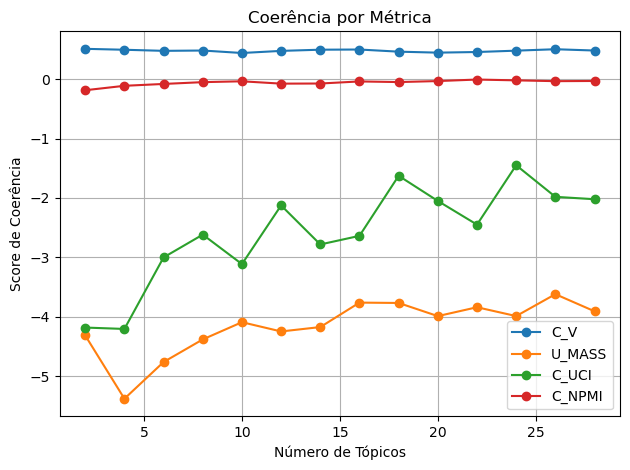


Resultados de Coerência para C_V:
Qtd. tópicos = 2 -> Coerência = 0.512
Qtd. tópicos = 4 -> Coerência = 0.4965
Qtd. tópicos = 6 -> Coerência = 0.4781
Qtd. tópicos = 8 -> Coerência = 0.4835
Qtd. tópicos = 10 -> Coerência = 0.4417
Qtd. tópicos = 12 -> Coerência = 0.4773
Qtd. tópicos = 14 -> Coerência = 0.4974
Qtd. tópicos = 16 -> Coerência = 0.5003
Qtd. tópicos = 18 -> Coerência = 0.4643
Qtd. tópicos = 20 -> Coerência = 0.4478
Qtd. tópicos = 22 -> Coerência = 0.4583
Qtd. tópicos = 24 -> Coerência = 0.4812
Qtd. tópicos = 26 -> Coerência = 0.5053
Qtd. tópicos = 28 -> Coerência = 0.4834
Melhor número de tópicos segundo C_V: 2

Resultados de Coerência para U_MASS:
Qtd. tópicos = 2 -> Coerência = -4.3169
Qtd. tópicos = 4 -> Coerência = -5.3823
Qtd. tópicos = 6 -> Coerência = -4.764
Qtd. tópicos = 8 -> Coerência = -4.3831
Qtd. tópicos = 10 -> Coerência = -4.0932
Qtd. tópicos = 12 -> Coerência = -4.249
Qtd. tópicos = 14 -> Coerência = -4.1751
Qtd. tópicos = 16 -> Coerência = -3.7632
Qtd. tópic

In [15]:

# Função para determinar a melhor quantidade de tópicos para a modelagem
def compute_coherence_values(dictionary, corpus, texts, coherence, limit=30, start=2, step=5):
    coherence_values = []
    model_list = []
    topic_range = list(range(start, limit, step))

    for num_topics in tqdm(topic_range, desc=f"Calculando coerência ({coherence})"):
        model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=5, workers=4)
        model_list.append(model)

        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    optimal_index = coherence_values.index(max(coherence_values))
    optimal_num_topics = topic_range[optimal_index]
    return optimal_num_topics, model_list, coherence_values

# Calcular os valores de coerência para diferentes métricas
def calculate_coherence_for_metrics(dictionary, corpus, texts, metrics, start=2, limit=30, step=2):
    coherence_results = {}
    for metric in metrics:
        num_topics, model_list, coherence_values = compute_coherence_values(
            dictionary=dictionary,
            corpus=corpus,
            texts=texts,
            coherence=metric,
            start=start,
            limit=limit,
            step=step
        )
        coherence_results[metric] = {
            'num_topics': num_topics,
            'model_list': model_list,
            'coherence_values': coherence_values
        }
    return coherence_results

metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']

# Calcular os valores de coerência 
coherence_results = calculate_coherence_for_metrics(
    dictionary=id2word,
    corpus=corpus,
    texts=texto_processado,
    metrics=metrics,
    start=2,
    limit=30,
    step=2
)

# Plotar os resultados de coerência para cada métrica
for metric in metrics:
    x = list(range(2, 30, 2))
    coherence_values = coherence_results[metric]['coherence_values']
    plt.plot(x, coherence_values, marker='o', label=metric.upper())

plt.xlabel("Número de Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(loc='best')
plt.title("Coerência por Métrica")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar os resultados de coerência para cada métrica
for metric in metrics:
    print(f"\nResultados de Coerência para {metric.upper()}:")
    for m, cv in zip(range(2, 30, 2), coherence_results[metric]['coherence_values']):
        print(f"Qtd. tópicos = {m} -> Coerência = {round(cv, 4)}")
    print(f"Melhor número de tópicos segundo {metric.upper()}: {coherence_results[metric]['num_topics']}")


In [12]:
# tamanho do corpus
len(corpus)


254480

In [16]:

pyLDAvis.enable_notebook()  


# Escolher a métrica para visualizar
chosen_metric = 'u_mass'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.269359  0.014689       1        1  15.055045
3      0.046045  0.095727       2        1   8.086898
12     0.233283 -0.023302       3        1   7.526266
15     0.107361 -0.012965       4        1   4.906469
23     0.129273  0.029763       5        1   4.446653
7      0.106447  0.022361       6        1   4.348554
13     0.131405  0.070819       7        1   4.106351
8      0.032508 -0.180814       8        1   3.973448
11    -0.176209  0.157612       9        1   3.793682
5      0.078589  0.059807      10        1   3.736977
21    -0.107581  0.205600      11        1   3.696665
6      0.125250  0.057315      12        1   3.491135
1      0.139066 -0.040917      13        1   3.156763
10    -0.043242  0.142731      14        1   3.125647
25    -0.196024  0.029263      15        1   3.063736
0     -0.055392  0.072688      16        1   2.769331
19    -0.203932 -0.309426      17        1   2.697491
14    -0.061114 -0.103950      18        1   2.561741
20    -0.014750 -0.178243      19        1   2.546136
2     -0.199196  0.082899      20        1   2.380616
16    -0.068129  0.058346      21        1   2.258644
24     0.083340 -0.050883      22        1   2.111564
9     -0.021537 -0.151029      23        1   1.936602
22    -0.091984 -0.017179      24        1   1.813720
18    -0.044402 -0.064123      25        1   1.448417
17    -0.198433  0.033211      26        1   0.961451, topic_info=         Term          Freq         Total Category  logprob  loglift
1757       13  78089.000000  78089.000000  Default  30.0000  30.0000
8186    phone  60477.000000  60477.000000  Default  29.0000  29.0000
3968       55  46140.000000  46140.000000  Default  28.0000  28.0000
39         be  38809.000000  38809.000000  Default  27.0000  27.0000
40      youtu  38786.000000  38786.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
512     bahia    644.224444   2417.728872  Topic26  -4.5782   3.3219
9082  fazenda    490.059962   1155.814267  Topic26  -4.8518   3.7864
1690   filmes    472.701612   1166.332433  Topic26  -4.8878   3.7413
986     porto    520.015150   2118.111811  Topic26  -4.7924   3.2401
7065       64    423.912961   1259.678811  Topic26  -4.9968   3.5554

[1824 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2280      2  0.505344     0
2280      4  0.000354     0
2280      9  0.008499     0
2280     11  0.024435     0
2280     14  0.460369     0
...     ...       ...   ...
5020      2  0.124565  zona
5020      3  0.076296  zona
5020      9  0.773473  zona
5020     18  0.000389  zona
4838     18  0.993591  zoom

[6312 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 13, 16, 24, 8, 14, 9, 12, 6, 22, 7, 2, 11, 26, 1, 20, 15, 21, 3, 17, 25, 10, 23, 19, 18])

In [17]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus))

Diversidade de Tópicos: 0.7538
IRBO médio: 0.9715

Perplexidade:  -10.5239031326355


In [18]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_v'  # ou 'u_mass', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis  


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.236044  0.0       1        1  77.330868
0     -0.236044  0.0       2        1  22.669132, topic_info=            Term          Freq         Total Category  logprob  loglift
8186       phone  76255.000000  76255.000000  Default  30.0000  30.0000
3968          55  57527.000000  57527.000000  Default  29.0000  29.0000
67324    9999999  46480.000000  46480.000000  Default  28.0000  28.0000
97           www  42816.000000  42816.000000  Default  27.0000  27.0000
39            be  42586.000000  42586.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
28         grupo   8767.463284  14205.171412   Topic2  -5.1278   1.0016
94          news   5678.700560   7276.049158   Topic2  -5.5621   1.2363
285    bolsonaro  15319.759610  49773.916344   Topic2  -4.5697   0.3058
54        brasil   8521.329950  43487.787016   Topic2  -5.1563  -0.1457
9           lula   6402.182243  45504.913405   Topic2  -5.4422  -0.4770

[148 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
48        1  0.329260        1
48        2  0.670725        1
7045      1  0.000532      101
7045      2  0.999688      101
4441      1  0.000501      111
...     ...       ...      ...
97        2  0.999545      www
40        1  0.000023    youtu
40        2  0.999981    youtu
17        1  0.021784  youtube
17        2  0.978240  youtube

[215 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [19]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus))

Diversidade de Tópicos: 0.95
IRBO médio: 0.99

Perplexidade:  -8.344455192016323


In [20]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_uci'  # ou 'c_v', 'u_mass', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
22    -0.257034  0.019861       1        1  10.377641
10    -0.050986 -0.023845       2        1   8.833416
16    -0.209587  0.082813       3        1   8.579074
6     -0.215329  0.082207       4        1   6.405763
15    -0.151553 -0.027016       5        1   6.211764
18    -0.178928  0.025760       6        1   5.391303
20     0.122793  0.133582       7        1   5.287434
21     0.126953  0.163674       8        1   4.235112
7     -0.017390 -0.032544       9        1   4.027824
11     0.112984 -0.194108      10        1   3.891650
0     -0.191032  0.022917      11        1   3.457311
17     0.190553  0.056649      12        1   3.308806
5     -0.023411 -0.218527      13        1   3.252004
8     -0.129804 -0.067009      14        1   3.190659
13     0.015132 -0.134746      15        1   2.856275
12     0.177129  0.133746      16        1   2.759782
19     0.083312 -0.246334      17        1   2.623760
1      0.128671  0.135913      18        1   2.465212
14     0.053364  0.120644      19        1   2.312363
4      0.216441 -0.110335      20        1   2.224157
3      0.099115 -0.111258      21        1   2.145602
23    -0.040244  0.002642      22        1   2.119837
2      0.109618  0.098986      23        1   2.109661
9      0.029233  0.086328      24        1   1.933591, topic_info=           Term          Freq         Total Category  logprob  loglift
8186      phone  67674.000000  67674.000000  Default  30.0000  30.0000
1757         13  61961.000000  61961.000000  Default  29.0000  29.0000
3968         55  56773.000000  56773.000000  Default  28.0000  28.0000
39           be  48133.000000  48133.000000  Default  27.0000  27.0000
40        youtu  48103.000000  48103.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
285   bolsonaro    782.850144  65206.657005  Topic24  -5.0820  -0.4766
1593       acha    346.024833   1547.588276  Topic24  -5.8985   2.4478
471       ainda    364.144212   8541.053853  Topic24  -5.8474   0.7907
268           7    341.302747   5170.924870  Topic24  -5.9122   1.2278
54       brasil    350.949680  49887.883783  Topic24  -5.8843  -1.0111

[1745 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2280      2  0.274015     0
2280      7  0.323615     0
2280      8  0.001387     0
2280     10  0.015262     0
2280     15  0.375296     0
...     ...       ...   ...
5020      4  0.117395  zona
5020      5  0.000346  zona
5020      8  0.841849  zona
5020      9  0.000693  zona
5020     14  0.011082  zona

[6386 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[23, 11, 17, 7, 16, 19, 21, 22, 8, 12, 1, 18, 6, 9, 14, 13, 20, 2, 15, 5, 4, 24, 3, 10])

In [21]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus))

Diversidade de Tópicos: 0.7667
IRBO médio: 0.9613

Perplexidade:  -10.347033537821783


In [22]:

pyLDAvis.enable_notebook() 

# Escolher a métrica para visualizar
chosen_metric = 'c_npmi'  # ou 'c_v', 'c_uci', 'u_mass'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis  

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
20    -0.226092 -0.041449       1        1  14.998388
15    -0.209294  0.014341       2        1  12.954375
7     -0.015960 -0.064275       3        1   7.977578
19    -0.180822 -0.028892       4        1   7.861919
1     -0.169170 -0.003027       5        1   6.976389
9     -0.070402 -0.043324       6        1   4.121619
6      0.085547 -0.106268       7        1   4.064583
12    -0.044712  0.118562       8        1   3.908823
18     0.209834 -0.244790       9        1   3.593587
16    -0.010828  0.098993      10        1   3.200956
10    -0.007951  0.171933      11        1   3.193994
5     -0.093900  0.041941      12        1   3.168822
4      0.082903 -0.242191      13        1   3.151449
0      0.203586 -0.073261      14        1   3.003100
21     0.044745  0.023277      15        1   2.809028
3     -0.111516 -0.011301      16        1   2.807779
14     0.183804  0.235046      17        1   2.308903
17     0.105240 -0.046725      18        1   2.294447
8     -0.043533 -0.069532      19        1   2.274759
11    -0.032746 -0.001411      20        1   2.188569
13     0.074781  0.094911      21        1   1.577706
2      0.226487  0.177442      22        1   1.563226, topic_info=        Term          Freq         Total Category  logprob  loglift
8186   phone  59528.000000  59528.000000  Default  30.0000  30.0000
1757      13  59898.000000  59898.000000  Default  29.0000  29.0000
39        be  37756.000000  37756.000000  Default  28.0000  28.0000
40     youtu  37734.000000  37734.000000  Default  27.0000  27.0000
3968      55  45440.000000  45440.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
2792   saiba    213.262140   1123.402751  Topic22  -6.1698   2.4968
54    brasil    273.517974  45939.427067  Topic22  -5.9210  -0.9653
94      news    205.946823   8658.352001  Topic22  -6.2047   0.4198
125     2022    202.390901   9387.000147  Topic22  -6.2222   0.3215
1102   agora    198.226610  16958.037147  Topic22  -6.2429  -0.2907

[1551 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
47        1  0.002596    00
47        3  0.083888    00
47        7  0.527512    00
47        8  0.068859    00
47        9  0.000137    00
...     ...       ...   ...
5020      1  0.001442  zona
5020      2  0.000721  zona
5020      4  0.001442  zona
5020      7  0.961705  zona
5020     13  0.034256  zona

[4979 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[21, 16, 8, 20, 2, 10, 7, 13, 19, 17, 11, 6, 5, 1, 22, 4, 15, 18, 9, 12, 14, 3])

In [23]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus))

Diversidade de Tópicos: 0.7409
IRBO médio: 0.9719

Perplexidade:  -10.161588285670613


In [21]:
df_geral.shape

(254480, 20)

# Modelando os Tópicos com filtro religioso

In [24]:
palavras_religiosas = [
    "deus", "jesus", "misericordia", "davi",
    "salomao", "reino", "templo", "conservador",
    "pentecostal", "rcc", "renovacao", "carismatic",
    "paulo ricardo", "bernardo kuster", "herege", "ateu",
    "jerico", "heresia"
]


In [25]:
# Função para verificar se uma palavra está relacionada à religião
def relacionada_religiao(word):
    word_lower = word.lower()
    palavras_religiosas_lower = [palavra.lower() for palavra in palavras_religiosas]

    # Verificando se alguma palavra da lista de palavras religiosas está presente
    return any(palavra in word_lower for palavra in palavras_religiosas_lower)


df_religiao = df_geral[df_geral['text_processed'].apply(lambda x: relacionada_religiao(x))]



In [24]:
len(df_religiao)

15472

In [26]:
def processar_texto(texto):
    texto = texto.lower()
    palavras_texto = token_espaco.tokenize(texto)
    palavras_texto = token_pontuacao.tokenize(' '.join(palavras_texto))
    return [palavra for palavra in palavras_texto ]

texto_processado_religiao = df_religiao['text_processed'].apply(processar_texto)

In [27]:
# Criar dicionário
id2word_religiao = corpora.Dictionary(texto_processado_religiao)
# Criar o Corpus: A Frequência das palavras nos documentos
corpus_religiao = [id2word_religiao.doc2bow(text) for text in texto_processado_religiao]

In [27]:
# tamanho do corpus
len(corpus_religiao)

15472

Calculando coerência (c_npmi): 100%|██████████| 14/14 [07:44<00:00, 33.14s/it]


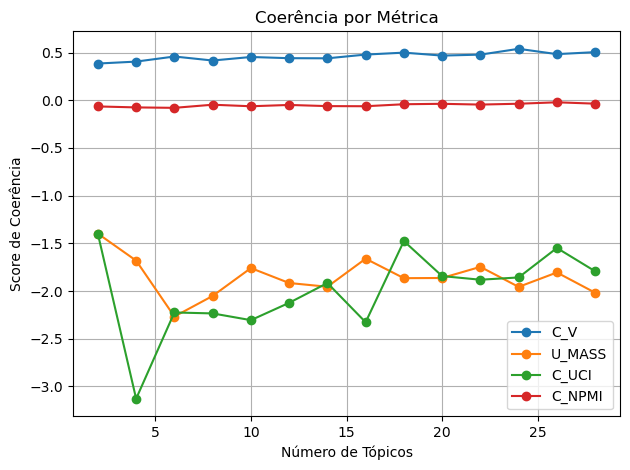


Resultados de Coerência para C_V:
Qtd. tópicos = 2 -> Coerência = 0.3844
Qtd. tópicos = 4 -> Coerência = 0.4046
Qtd. tópicos = 6 -> Coerência = 0.458
Qtd. tópicos = 8 -> Coerência = 0.416
Qtd. tópicos = 10 -> Coerência = 0.453
Qtd. tópicos = 12 -> Coerência = 0.4405
Qtd. tópicos = 14 -> Coerência = 0.4391
Qtd. tópicos = 16 -> Coerência = 0.4782
Qtd. tópicos = 18 -> Coerência = 0.4987
Qtd. tópicos = 20 -> Coerência = 0.4676
Qtd. tópicos = 22 -> Coerência = 0.4777
Qtd. tópicos = 24 -> Coerência = 0.5385
Qtd. tópicos = 26 -> Coerência = 0.4829
Qtd. tópicos = 28 -> Coerência = 0.5038
Melhor número de tópicos segundo C_V: 24

Resultados de Coerência para U_MASS:
Qtd. tópicos = 2 -> Coerência = -1.3986
Qtd. tópicos = 4 -> Coerência = -1.6812
Qtd. tópicos = 6 -> Coerência = -2.2673
Qtd. tópicos = 8 -> Coerência = -2.0516
Qtd. tópicos = 10 -> Coerência = -1.7594
Qtd. tópicos = 12 -> Coerência = -1.916
Qtd. tópicos = 14 -> Coerência = -1.9552
Qtd. tópicos = 16 -> Coerência = -1.6613
Qtd. tópic

In [28]:

# Função para determinar a melhor quantidade de tópicos para a modelagem
def compute_coherence_values(dictionary, corpus_religiao, texts, coherence, limit=30, start=2, step=5):
    coherence_values = []
    model_list = []
    topic_range = list(range(start, limit, step))

    for num_topics in tqdm(topic_range, desc=f"Calculando coerência ({coherence})"):
        model = LdaMulticore(corpus=corpus_religiao, id2word=dictionary, num_topics=num_topics, passes=5, workers=4)
        model_list.append(model)

        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    optimal_index = coherence_values.index(max(coherence_values))
    optimal_num_topics = topic_range[optimal_index]
    return optimal_num_topics, model_list, coherence_values

# Calcular os valores de coerência para diferentes métricas
def calculate_coherence_for_metrics(dictionary, corpus_religiao, texts, metrics, start=2, limit=30, step=2):
    coherence_results = {}
    for metric in metrics:
        num_topics, model_list, coherence_values = compute_coherence_values(
            dictionary=dictionary,
            corpus_religiao=corpus_religiao,
            texts=texts,
            coherence=metric,
            start=start,
            limit=limit,
            step=step
        )
        coherence_results[metric] = {
            'num_topics': num_topics,
            'model_list': model_list,
            'coherence_values': coherence_values
        }
    return coherence_results

metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']

# Calcular os valores de coerência 
coherence_results = calculate_coherence_for_metrics(
    dictionary=id2word_religiao,
    corpus_religiao=corpus_religiao,
    texts=texto_processado_religiao,
    metrics=metrics,
    start=2,
    limit=30,
    step=2
)

# Plotar os resultados de coerência para cada métrica
for metric in metrics:
    x = list(range(2, 30, 2))
    coherence_values = coherence_results[metric]['coherence_values']
    plt.plot(x, coherence_values, marker='o', label=metric.upper())

plt.xlabel("Número de Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(loc='best')
plt.title("Coerência por Métrica")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar os resultados de coerência para cada métrica
for metric in metrics:
    print(f"\nResultados de Coerência para {metric.upper()}:")
    for m, cv in zip(range(2, 30, 2), coherence_results[metric]['coherence_values']):
        print(f"Qtd. tópicos = {m} -> Coerência = {round(cv, 4)}")
    print(f"Melhor número de tópicos segundo {metric.upper()}: {coherence_results[metric]['num_topics']}")


In [29]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'u_mass'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_religiao, id2word_religiao)
vis  


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.081763  0.0       1        1  56.353396
1     -0.081763  0.0       2        1  43.646604, topic_info=           Term          Freq         Total Category  logprob  loglift
814          20   9709.000000   9709.000000  Default  30.0000  30.0000
4485      phone  43654.000000  43654.000000  Default  29.0000  29.0000
1500         91   3317.000000   3317.000000  Default  28.0000  28.0000
479       youtu   4504.000000   4504.000000  Default  27.0000  27.0000
427          be   4502.000000   4502.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
319   bolsonaro   2562.228245  12036.610701   Topic2  -5.7593  -0.7180
342      contra   1744.667404   4717.580602   Topic2  -6.1436  -0.1657
377        lula   2136.710679  10999.629438   Topic2  -5.9409  -0.8095
278       mundo   1592.562376   3758.868684   Topic2  -6.2348  -0.0297
518        povo   1679.482021   5639.618825   Topic2  -6.1817  -0.3823

[219 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
44753      1  0.019091   0200
44753      2  0.980785   0200
44755      1  0.019092   0689
44755      2  0.980839   0689
44756      1  0.021478   0925
...      ...       ...    ...
93         2  0.146274    www
479        1  0.967008  youtu
479        2  0.032855  youtu
43127      1  0.983782   yuki
43127      2  0.011997   yuki

[344 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [30]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_religiao))

Diversidade de Tópicos: 0.7
IRBO médio: 0.402

Perplexidade:  -8.290151835694239


In [31]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_v'  # ou 'u_mass', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_religiao, id2word_religiao)
vis  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.069584 -0.072929       1        1  16.676229
1     -0.491031 -0.018503       2        1   9.470873
22     0.044747  0.143779       3        1   8.094092
21     0.001194 -0.046471       4        1   7.795376
7      0.045671  0.121718       5        1   6.913867
8     -0.062438  0.128690       6        1   4.118616
5      0.036142  0.136946       7        1   3.803362
18     0.024908 -0.160314       8        1   3.674296
13     0.031877 -0.104950       9        1   3.672485
11     0.020917 -0.031955      10        1   3.593033
17     0.037908  0.011201      11        1   3.380506
14     0.043540 -0.020171      12        1   3.121868
23    -0.013201  0.154257      13        1   2.827365
20     0.034323 -0.003727      14        1   2.797183
4      0.024848 -0.049257      15        1   2.656439
6      0.029776 -0.018738      16        1   2.573234
3      0.020475  0.154282      17        1   2.529013
15     0.030393 -0.026643      18        1   2.393991
2     -0.007981 -0.036171      19        1   2.181939
10     0.019471 -0.021904      20        1   2.009741
0      0.031638 -0.125959      21        1   1.940190
9     -0.024773 -0.088873      22        1   1.432566
19     0.031820 -0.033783      23        1   1.224914
16     0.020190  0.009475      24        1   1.118822, topic_info=         Term          Freq         Total Category  logprob  loglift
4485    phone  37574.000000  37574.000000  Default  30.0000  30.0000
1295       55  29405.000000  29405.000000  Default  29.0000  29.0000
377      lula  10087.000000  10087.000000  Default  28.0000  28.0000
46        nao  29242.000000  29242.000000  Default  27.0000  27.0000
427        be   3783.000000   3783.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
63         so     94.922616   3954.761214  Topic24  -5.3910   0.7633
293     todos     96.249543   8637.762156  Topic24  -5.3771  -0.0041
130         4     77.443989   2087.291165  Topic24  -5.5945   1.1988
126        10     74.876961   2594.072258  Topic24  -5.6282   0.9478
606   direito     71.817083   1847.697874  Topic24  -5.6700   1.2453

[2008 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
4145       1  0.010325      0
4145       2  0.003097      0
4145       3  0.401628      0
4145       4  0.003097      0
4145       5  0.245726      0
...      ...       ...    ...
1482      17  0.007143   zica
1482      18  0.007143   zica
6987      10  0.081221   zoom
6987      19  0.812212   zoom
20103     24  0.901945  zumba

[15238 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 2, 23, 22, 8, 9, 6, 19, 14, 12, 18, 15, 24, 21, 5, 7, 4, 16, 3, 11, 1, 10, 20, 17])

In [32]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_religiao))

Diversidade de Tópicos: 0.5375
IRBO médio: 0.8314

Perplexidade:  -7.50819152523409


In [33]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_uci'  # ou 'c_v', 'u_mass', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_religiao, id2word_religiao)
vis  


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.113195  0.0       1        1  70.132582
1     -0.113195  0.0       2        1  29.867418, topic_info=       Term          Freq         Total Category  logprob  loglift
4485  phone  38212.000000  38212.000000  Default  30.0000  30.0000
1295     55  29942.000000  29942.000000  Default  29.0000  29.0000
814      20   8820.000000   8820.000000  Default  28.0000  28.0000
34     deus  15307.000000  15307.000000  Default  27.0000  27.0000
125       1   7037.000000   7037.000000  Default  26.0000  26.0000
...     ...           ...           ...      ...      ...      ...
801     vai   1352.868560   5839.434193   Topic2  -6.0186  -0.2540
36      dia   1398.708344   6967.563077   Topic2  -5.9853  -0.3973
520   vamos   1222.258310   4651.945405   Topic2  -6.1201  -0.1282
287     sao   1209.985070   6077.437055   Topic2  -6.1302  -0.4056
986   agora   1163.162173   4051.795002   Topic2  -6.1697  -0.0396

[214 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
1259       1  0.946877        00
1259       2  0.053566        00
1260       1  0.960319       000
1260       2  0.040218       000
44754      1  0.010635      0523
...      ...       ...       ...
26951      2  0.011046  viaturas
68         1  0.694026      voce
68         2  0.306037      voce
479        1  0.964881     youtu
479        2  0.035044     youtu

[338 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [34]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_religiao))

Diversidade de Tópicos: 0.8
IRBO médio: 0.773

Perplexidade:  -8.23283255617797


In [35]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_npmi'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_religiao, id2word_religiao)
vis  


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.093385 -0.112182       1        1  9.805266
7      0.031973  0.202209       2        1  9.270368
17     0.078778 -0.059364       3        1  6.926082
15     0.097080 -0.030525       4        1  5.971270
20     0.040256 -0.165058       5        1  5.628464
4     -0.484991 -0.017195       6        1  5.595426
6      0.014165  0.225794       7        1  5.474170
9     -0.006276  0.072771       8        1  4.335607
21     0.047458 -0.040781       9        1  4.138087
19    -0.427773 -0.050597      10        1  3.979368
22     0.041429 -0.111994      11        1  3.827061
23     0.079132 -0.020312      12        1  3.817704
12     0.039928 -0.040543      13        1  3.701487
16     0.056625  0.023759      14        1  2.666504
13     0.019118 -0.091218      15        1  2.639484
2      0.014762  0.086838      16        1  2.635550
8      0.080518 -0.019405      17        1  2.615486
3     -0.083344  0.061259      18        1  2.512876
10     0.001756  0.003439      19        1  2.351334
14     0.044229 -0.024257      20        1  2.329463
18     0.052053  0.008268      21        1  2.256787
25     0.055075 -0.003678      22        1  1.782884
11     0.022524 -0.038087      23        1  1.782096
1      0.066314 -0.002325      24        1  1.584456
24     0.020021  0.153075      25        1  1.319875
5      0.005805 -0.009891      26        1  1.052846, topic_info=            Term          Freq         Total Category  logprob  loglift
4485       phone  38083.000000  38083.000000  Default  30.0000  30.0000
1295          55  29696.000000  29696.000000  Default  29.0000  29.0000
814           20   8864.000000   8864.000000  Default  28.0000  28.0000
377         lula  10196.000000  10196.000000  Default  27.0000  27.0000
479        youtu   3904.000000   3904.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
117         vida     60.437683   2581.011685  Topic26  -5.7817   0.7993
125            1     64.027064   7111.800756  Topic26  -5.7240  -0.1565
1002  brasileiro     57.523101   2010.077010  Topic26  -5.8311   0.9999
293        todos     61.223799   8452.332232  Topic26  -5.7688  -0.3740
114          pra     58.264084   4260.747400  Topic26  -5.8183   0.2615

[2084 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
4145      1  0.005768     0
4145      2  0.635388     0
4145      3  0.004806     0
4145      4  0.011535     0
4145      5  0.002884     0
...     ...       ...   ...
1482     12  0.007588  zica
1482     15  0.007588  zica
1482     19  0.007588  zica
1482     24  0.007588  zica
1482     26  0.007588  zica

[16341 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 8, 18, 16, 21, 5, 7, 10, 22, 20, 23, 24, 13, 17, 14, 3, 9, 4, 11, 15, 19, 26, 12, 2, 25, 6])

In [36]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_religiao))

Diversidade de Tópicos: 0.5308
IRBO médio: 0.8485

Perplexidade:  -7.480982290005751


## Modelando os tópicos com filtro de inclusão religioso e exclusão de termas políticos

In [37]:
palavras_politicas = [ "lula", "bolsonaro", "pt", "pl", "stf", "patria", "55", "22", "13", "senadores", "lulaladrao",
                       "urnas", "alexandre", "moraes", "comunismo", "eleicao", "eleicoes", "esquerda", "direita",
                         "presidente", "tse", "fraude", "voto", "turno", "ministro"]

In [38]:
def retirar_mensagens_com_palavras_politicas(word):
    word_lower = word.lower()
    palavras_politica_lower = [palavra.lower() for palavra in palavras_politicas]

    return any(palavra in word_lower for palavra in palavras_politica_lower)


df_politico = df_religiao[~df_religiao['text_processed'].apply(lambda x: retirar_mensagens_com_palavras_politicas(x))]



In [87]:
df_politico.shape

(5180, 20)

In [88]:
df_politico.head()

,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5,pre_processed_text,text_processed
date_message,,,,,,,,,,,,,,,,,,,,
2022-10-10 18:18:11,f9fd00ad20b8d4a40ad9fd2d7c64cb40,e110071613239754d38878f7e046e95b,NaN,NaN,NaN,False,False,False,5,2022-10-10 18:18:11.689928,0.4404,NaN,44C0D9A25FA1F439172A6F67EC88B3ED,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN,deus perdoa porque eles não sabem que fazem e ...,deus perdoa porque nao sabem fazem falam nao t...
2022-10-10 16:57:12,3d4e77cea17b1812993b55543e81400e,d01bfa0f0d31fa1307e7aeb9d3c3870e,NaN,NaN,https://www.portalcidade.news/imprensa-tendenc...,False,True,False,5,2022-10-10 16:57:12.981007,0.0000,NaN,0993FD7ABC0CA5A21AED8DA493993B73,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN,imprensa tendenciosa age novamente e ataca pre...,imprensa tendenciosa age novamente ataca prefe...
2022-10-10 18:34:17,71d2b615339a7c53dcf2427491da5d36,e110071613239754d38878f7e046e95b,NaN,NaN,NaN,False,False,False,5,2022-10-10 18:34:17.860259,-0.7351,NaN,712BCD08CC4F7EA5514AC4A7BD6C8B9B,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN,abre o esgoto que vc chama de boca porra e adm...,abre esgoto vc chama boca porra admita deus ma...
2022-10-10 18:35:14,f9fd00ad20b8d4a40ad9fd2d7c64cb40,e110071613239754d38878f7e046e95b,NaN,NaN,NaN,False,False,False,5,2022-10-10 18:35:14.825606,-0.3612,0.267817,9D8849865FB72F726E9B182937590C9C,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN,deus é vida morreu na cruz pra dar vida ou sej...,deus vida morreu cruz pra dar vida vc nao acre...
2022-10-10 18:37:01,0842f1acc471ab358a596e0c34006c21,e110071613239754d38878f7e046e95b,NaN,NaN,NaN,False,False,False,5,2022-10-10 18:37:01.781209,0.5514,0.116997,EABCED2ADAF7A65F48B7CD567F28534D,558594228826.0:12@s.whatsapp.net,TextoExtendido,whatsapp,NaN,NaN,a gente pode manda em deus ser ele tem um decr...,gente pode manda deus decreto tal cidade pode ...


In [39]:
def processar_texto(texto):
    texto = texto.lower()
    palavras_texto = token_espaco.tokenize(texto)
    palavras_texto = token_pontuacao.tokenize(' '.join(palavras_texto))
    return [palavra for palavra in palavras_texto ]

texto_processado_politico = df_politico['text_processed'].apply(processar_texto)

In [40]:
# Criar dicionário
id2word_politico = corpora.Dictionary(texto_processado_politico)
# Criar o Corpus: A Frequência das palavras nos documentos
corpus_politico = [id2word_politico.doc2bow(text) for text in texto_processado_politico]

Calculando coerência (c_npmi): 100%|██████████| 14/14 [04:03<00:00, 17.39s/it]


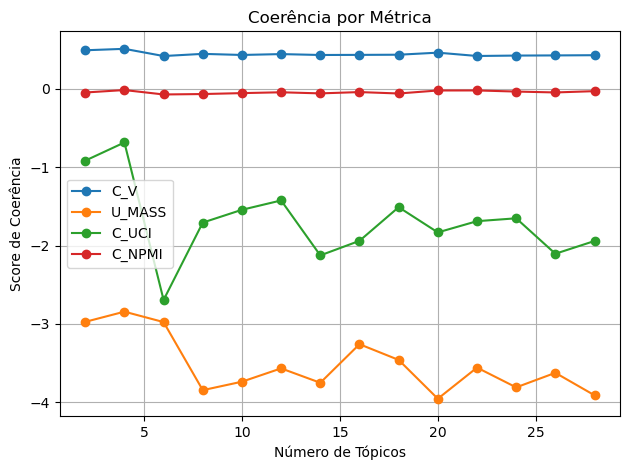


Resultados de Coerência para C_V:
Qtd. tópicos = 2 -> Coerência = 0.493
Qtd. tópicos = 4 -> Coerência = 0.5114
Qtd. tópicos = 6 -> Coerência = 0.4193
Qtd. tópicos = 8 -> Coerência = 0.4471
Qtd. tópicos = 10 -> Coerência = 0.433
Qtd. tópicos = 12 -> Coerência = 0.4442
Qtd. tópicos = 14 -> Coerência = 0.4327
Qtd. tópicos = 16 -> Coerência = 0.4342
Qtd. tópicos = 18 -> Coerência = 0.4362
Qtd. tópicos = 20 -> Coerência = 0.4625
Qtd. tópicos = 22 -> Coerência = 0.4201
Qtd. tópicos = 24 -> Coerência = 0.4253
Qtd. tópicos = 26 -> Coerência = 0.4273
Qtd. tópicos = 28 -> Coerência = 0.43
Melhor número de tópicos segundo C_V: 4

Resultados de Coerência para U_MASS:
Qtd. tópicos = 2 -> Coerência = -2.9746
Qtd. tópicos = 4 -> Coerência = -2.8444
Qtd. tópicos = 6 -> Coerência = -2.9775
Qtd. tópicos = 8 -> Coerência = -3.8467
Qtd. tópicos = 10 -> Coerência = -3.7385
Qtd. tópicos = 12 -> Coerência = -3.5685
Qtd. tópicos = 14 -> Coerência = -3.7524
Qtd. tópicos = 16 -> Coerência = -3.2598
Qtd. tópico

In [41]:

# Função para determinar a melhor quantidade de tópicos para a modelagem
def compute_coherence_values(dictionary, corpus_politico, texts, coherence, limit=30, start=2, step=5):
    coherence_values = []
    model_list = []
    topic_range = list(range(start, limit, step))

    for num_topics in tqdm(topic_range, desc=f"Calculando coerência ({coherence})"):
        model = LdaMulticore(corpus=corpus_politico, id2word=dictionary, num_topics=num_topics, passes=5, workers=4)
        model_list.append(model)

        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    optimal_index = coherence_values.index(max(coherence_values))
    optimal_num_topics = topic_range[optimal_index]
    return optimal_num_topics, model_list, coherence_values

# Calcular os valores de coerência para diferentes métricas
def calculate_coherence_for_metrics(dictionary, corpus_politico, texts, metrics, start=2, limit=30, step=2):
    coherence_results = {}
    for metric in metrics:
        num_topics, model_list, coherence_values = compute_coherence_values(
            dictionary=dictionary,
            corpus_politico=corpus_politico,
            texts=texts,
            coherence=metric,
            start=start,
            limit=limit,
            step=step
        )
        coherence_results[metric] = {
            'num_topics': num_topics,
            'model_list': model_list,
            'coherence_values': coherence_values
        }
    return coherence_results

metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']

# Calcular os valores de coerência 
coherence_results = calculate_coherence_for_metrics(
    dictionary=id2word_politico,
    corpus_politico=corpus_politico,
    texts=texto_processado_politico,
    metrics=metrics,
    start=2,
    limit=30,
    step=2
)

# Plotar os resultados de coerência para cada métrica
for metric in metrics:
    x = list(range(2, 30, 2))
    coherence_values = coherence_results[metric]['coherence_values']
    plt.plot(x, coherence_values, marker='o', label=metric.upper())

plt.xlabel("Número de Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(loc='best')
plt.title("Coerência por Métrica")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar os resultados de coerência para cada métrica
for metric in metrics:
    print(f"\nResultados de Coerência para {metric.upper()}:")
    for m, cv in zip(range(2, 30, 2), coherence_results[metric]['coherence_values']):
        print(f"Qtd. tópicos = {m} -> Coerência = {round(cv, 4)}")
    print(f"Melhor número de tópicos segundo {metric.upper()}: {coherence_results[metric]['num_topics']}")


In [42]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'u_mass'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_politico, id2word_politico)
vis  



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.015477 -0.054083       1        1  28.733668
3      0.031059 -0.039136       2        1  26.472352
0     -0.097152  0.018040       3        1  23.744236
2      0.050615  0.075179       4        1  21.049744, topic_info=        Term         Freq        Total Category  logprob  loglift
240    vamos   694.000000   694.000000  Default  30.0000  30.0000
263    jesus  1292.000000  1292.000000  Default  29.0000  29.0000
1724       r   206.000000   206.000000  Default  28.0000  28.0000
269     nome   553.000000   553.000000  Default  27.0000  27.0000
246       be   236.000000   236.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
46       pra    87.675109   515.295384   Topic4  -5.6634  -0.2128
236   tambem    67.112876   260.023377   Topic4  -5.9307   0.2039
124       ja    67.882036   365.512729   Topic4  -5.9193  -0.1252
466     todo    56.976542   306.610710   Topic4  -6.0944  -0.1247
66    brasil    58.351046   606.774320   Topic4  -6.0706  -0.7834

[338 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
556       1  0.032691     00
556       2  0.073554     00
556       3  0.874481     00
556       4  0.016345     00
472       1  0.176989      1
...     ...       ...    ...
22        4  0.182366    www
258       1  0.114275  youtu
258       2  0.050789  youtu
258       3  0.169296  youtu
258       4  0.664488  youtu

[731 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

In [43]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_politico))

Diversidade de Tópicos: 0.525
IRBO médio: 0.3957

Perplexidade:  -7.937980440231963


In [44]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_v'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_politico, id2word_politico)
vis  



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.023688  0.058327       1        1  37.758104
1     -0.082062 -0.018596       2        1  27.996987
0      0.068689  0.041990       3        1  18.914711
2      0.037061 -0.081721       4        1  15.330198, topic_info=         Term         Freq        Total Category  logprob  loglift
111    senhor  1271.000000  1271.000000  Default  30.0000  30.0000
1724        r   187.000000   187.000000  Default  29.0000  29.0000
263     jesus  1303.000000  1303.000000  Default  28.0000  28.0000
4         nao  2495.000000  2495.000000  Default  27.0000  27.0000
1        deus  4879.000000  4879.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
66     brasil    55.496142   623.357659   Topic4  -5.8037  -0.5435
136       pai    45.789963   328.294628   Topic4  -5.9959  -0.0945
269      nome    51.471409   559.399569   Topic4  -5.8790  -0.5105
434   palavra    40.740666   234.210132   Topic4  -6.1128   0.1264
270      povo    43.803825   481.814424   Topic4  -6.0403  -0.5225

[330 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
556       1  0.008744      00
556       2  0.262326      00
556       3  0.585861      00
556       4  0.139907      00
472       1  0.188219       1
...     ...       ...     ...
1496      4  0.059358  voltar
258       1  0.370947   youtu
258       2  0.243034   youtu
258       3  0.345364   youtu
258       4  0.042638   youtu

[698 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

In [45]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_politico))

Diversidade de Tópicos: 0.575
IRBO médio: 0.4645

Perplexidade:  -7.91793302694798


In [46]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_uci'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_politico, id2word_politico)
vis  



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.007685  0.040219       1        1  42.223210
3     -0.107879 -0.037685       2        1  24.093733
1      0.085879 -0.065505       3        1  17.275912
0      0.029684  0.062971       4        1  16.407145, topic_info=       Term         Freq        Total Category  logprob  loglift
111  senhor  1229.000000  1229.000000  Default  30.0000  30.0000
269    nome   546.000000   546.000000  Default  29.0000  29.0000
246      be   224.000000   224.000000  Default  28.0000  28.0000
258   youtu   224.000000   224.000000  Default  27.0000  27.0000
82      dia   784.000000   784.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
66   brasil    66.186412   624.663524   Topic4  -5.6954  -0.4373
240   vamos    61.542689   723.581066   Topic4  -5.7682  -0.6570
892   acima    51.213461   300.577008   Topic4  -5.9519   0.0378
776      fe    51.287049   307.362650   Topic4  -5.9505   0.0169
438    pois    50.752526   300.171913   Topic4  -5.9609   0.0301

[350 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
556       1  0.034479     00
556       2  0.689576     00
556       3  0.249971     00
556       4  0.017239     00
244       1  0.023544    100
...     ...       ...    ...
258       2  0.071231  youtu
258       3  0.836966  youtu
258       4  0.053423  youtu
969       1  0.106330   zoom
969       3  0.850639   zoom

[727 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

In [47]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_politico))

Diversidade de Tópicos: 0.575
IRBO médio: 0.4266

Perplexidade:  -7.907000635498464


In [48]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_npmi'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_politico, id2word_politico)
vis  



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.031262 -0.081189       1        1  35.708674
2     -0.027131 -0.002165       2        1  25.423996
0     -0.045311  0.075435       3        1  25.274288
1      0.103704  0.007919       4        1  13.593042, topic_info=        Term         Freq        Total Category  logprob  loglift
111   senhor  1263.000000  1263.000000  Default  30.0000  30.0000
892    acima   287.000000   287.000000  Default  29.0000  29.0000
263    jesus  1295.000000  1295.000000  Default  28.0000  28.0000
66    brasil   601.000000   601.000000  Default  27.0000  27.0000
1724       r   209.000000   209.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
192   cristo    56.282544   436.067246   Topic4  -5.6694  -0.0518
115    todos    60.367463   848.961601   Topic4  -5.5993  -0.6480
435      paz    39.511213   280.967570   Topic4  -6.0232   0.0340
976        q    34.050476   205.344404   Topic4  -6.1719   0.1988
236   tambem    35.060350   261.824722   Topic4  -6.1427  -0.0150

[346 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
472       1  0.179643        1
472       2  0.402648        1
472       3  0.266367        1
472       4  0.154864        1
1130      1  0.147822       11
...     ...       ...      ...
968       2  0.034974  youtube
968       3  0.034974  youtube
968       4  0.699488  youtube
969       1  0.055200     zoom
969       4  0.883193     zoom

[727 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

In [49]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_politico))

Diversidade de Tópicos: 0.55
IRBO médio: 0.3798

Perplexidade:  -7.924055847050559
